In [2]:
import pandas as pd
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
import shap

In [3]:
df = pd.read_csv("data/processed/df.csv")
df = df.dropna()
print(df.shape)
display(df.head())

(67998, 2)


,filtered_text,label
0,"irony , Nobel-Peace-Prize-Recipient-In-Chief s...",1
1,"crisp lawyerly style , Trey Gowdy good 5 minut...",1
2,"— Magnus Dahlgren October 26 , 2016 ’ Hillary ...",1
3,Georgian trace case poison ex-GRU colonel Serg...,1
4,"Chemical weapon , sanction , , stag . bloc san...",1


In [27]:
df["label"].value_counts()

label
0    34000
1    33998
Name: count, dtype: int64

In [4]:
# Checking the maximim number of features
vec = CountVectorizer()
X_counts = vec.fit_transform(df["filtered_text"])
transformed_df = pd.DataFrame(
     X_counts.toarray(), columns=vec.get_feature_names_out(), index=df["filtered_text"] 
)

In [5]:
print(len(transformed_df.columns))

224908


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
      df["filtered_text"], df["label"], test_size=0.2, random_state=123
)
print(X_train.shape, y_train.shape)

(54398,) (54398,)


In [29]:
pipe_lr = make_pipeline(CountVectorizer(stop_words="english"), LogisticRegression())
pipe_lr

Pipeline(steps=[('countvectorizer', CountVectorizer(stop_words='english')),
                ('logisticregression', LogisticRegression())])

In [30]:
pipe_lr.fit(X_train, y_train)

/Users/jennylee/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer', CountVectorizer(stop_words='english')),
                ('logisticregression', LogisticRegression())])

In [31]:
pipe_lr.score(X_test, y_test)


0.9392647058823529

In [13]:
pipe_svc = make_pipeline(CountVectorizer(stop_words="english"), MultinomialNB())
pipe_svc.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer(stop_words='english')),
                ('multinomialnb', MultinomialNB())])

In [15]:
param_grid2 = {
      "countvectorizer__max_features": np.arange(10000, 224908, 1000),
      "multinomialnb__alpha": [0.001, 0.01, 0.1, 1.0, 10, 100]
}

random_search2 = RandomizedSearchCV(pipe_svc, 
      param_distributions=param_grid2, 
      n_iter=100, 
      n_jobs=-1, 
      return_train_score=True
      )

random_search2.fit(X_train, y_train)

/Users/jennylee/miniconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(estimator=Pipeline(steps=[('countvectorizer',
                                              CountVectorizer(stop_words='english')),
                                             ('multinomialnb',
                                              MultinomialNB())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'countvectorizer__max_features': array([ 10000,  11000,  12000,  13000,  14000,  15000,  16000,  17000,
        18000,  19000,  20000,  21000,  22000,  23000,  24000,  25000,
        26000,  27000,  28000,  29000,  30000,  3100...
       186000, 187000, 188000, 189000, 190000, 191000, 192000, 193000,
       194000, 195000, 196000, 197000, 198000, 199000, 200000, 201000,
       202000, 203000, 204000, 205000, 206000, 207000, 208000, 209000,
       210000, 211000, 212000, 213000, 214000, 215000, 216000, 217000,
       218000, 219000, 220000, 221000, 222000, 223000, 224000]),
                                        'multinomialnb__alpha': [0.001, 0.01,
                                                                 0.1, 1.0, 10,
                                                                 100]},
                   return_train_score=True)

In [16]:
random_search2.best_score_

0.8932680896952034

In [23]:
param_grid = {
      "countvectorizer__max_features": np.arange(10000, 224908, 1000),
      "logisticregression__C": [0.001, 0.01, 0.1, 1.0, 10, 100],
      "logisticregression__class_weight":["balanced", None]
}

In [24]:
random_search = RandomizedSearchCV(pipe_lr, 
      param_distributions=param_grid, 
      n_iter=100, 
      n_jobs=-1, 
      return_train_score=True
      )

In [25]:
random_search.fit(X_train, y_train)

/Users/jennylee/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jennylee/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

RandomizedSearchCV(estimator=Pipeline(steps=[('countvectorizer',
                                              CountVectorizer(stop_words='english')),
                                             ('logisticregression',
                                              LogisticRegression())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'countvectorizer__max_features': array([ 10000,  11000,  12000,  13000,  14000,  15000,  16000,  17000,
        18000,  19000,  20000,  21000,  22000,  23000,  24000,  25000,
        26000,  27000,  28000,  29000,...
       186000, 187000, 188000, 189000, 190000, 191000, 192000, 193000,
       194000, 195000, 196000, 197000, 198000, 199000, 200000, 201000,
       202000, 203000, 204000, 205000, 206000, 207000, 208000, 209000,
       210000, 211000, 212000, 213000, 214000, 215000, 216000, 217000,
       218000, 219000, 220000, 221000, 222000, 223000, 224000]),
                                        'logisticregression__C': [0.001, 0.01,
                                                                  0.1, 1.0, 10,
                                                                  100],
                                        'logisticregression__class_weight': ['balanced',
                                                                             None]},
                   return_train_score=True)

In [26]:
random_search.best_estimator_

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_features=148000, stop_words='english')),
                ('logisticregression',
                 LogisticRegression(C=0.1, class_weight='balanced'))])

In [27]:
random_search.score(X_test, y_test)

0.94125

In [11]:
models = {
      "logisticregression": LogisticRegression(),
      "linearsvc": LinearSVC(),
      "multinomialnb": MultinomialNB()
}

In [36]:
results_dict = {
      "model": [],
      "train_score": [],
      "test_score": [],
      "validation_score": [],
      "best_estimators": []
}

In [37]:
for model in list(models.keys()):
      model_key = models[model]
      pipe_model = make_pipeline(CountVectorizer(stop_words="english"), model_key)
      
      if model != "multinomialnb":
            param_grid = {
                  "countvectorizer__max_features": np.arange(100000, 224908, 1000),
                  f"{model}__C": [0.001, 0.01, 0.1, 1.0, 10, 100]
            }

      elif model == "multinomialnb":
            param_grid = {
                  "countvectorizer__max_features": np.arange(10000, 224908, 1000),
                  f"{model}__alpha": [0.001, 0.01, 0.1, 1.0, 10, 100]
            }

      random_search_model = RandomizedSearchCV(
            pipe_model,
            param_distributions=param_grid, 
            n_iter=100, 
            n_jobs=-1, 
            return_train_score=True
      )
      random_search_model.fit(X_train, y_train)

      train_score = pd.DataFrame(random_search_model.cv_results_)["mean_train_score"].mean()
      test_score = random_search_model.score(X_test, y_test)
      validation_score = random_search_model.best_score_
      best_estimators = list(random_search_model.best_estimator_)

      results_dict["model"].append(model)
      results_dict["train_score"].append(train_score)
      results_dict["test_score"].append(test_score)
      results_dict["validation_score"].append(validation_score)
      results_dict["best_estimators"].append(best_estimators)
      print(results_dict)

/Users/jennylee/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jennylee/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

{'model': ['logisticregression'], 'train_score': [0.9747138215658937], 'test_score': [0.9410294117647059], 'validation_score': [0.9323504201294452], 'best_estimators': [[CountVectorizer(max_features=105000, stop_words='english'), LogisticRegression(C=0.1)]]}


/Users/jennylee/miniconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/jennylee/miniconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/jennylee/miniconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/jennylee/miniconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/j

{'model': ['logisticregression', 'linearsvc'], 'train_score': [0.9747138215658937, 0.9890017101709051], 'test_score': [0.9410294117647059, 0.9391176470588235], 'validation_score': [0.9323504201294452, 0.9298503271954062], 'best_estimators': [[CountVectorizer(max_features=105000, stop_words='english'), LogisticRegression(C=0.1)], [CountVectorizer(max_features=137000, stop_words='english'), LinearSVC(C=0.01)]]}


/Users/jennylee/miniconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'model': ['logisticregression', 'linearsvc', 'multinomialnb'], 'train_score': [0.9747138215658937, 0.9890017101709051, 0.8924703526661504], 'test_score': [0.9410294117647059, 0.9391176470588235, 0.8955882352941177], 'validation_score': [0.9323504201294452, 0.9298503271954062, 0.893470307405525], 'best_estimators': [[CountVectorizer(max_features=105000, stop_words='english'), LogisticRegression(C=0.1)], [CountVectorizer(max_features=137000, stop_words='english'), LinearSVC(C=0.01)], [CountVectorizer(max_features=59000, stop_words='english'), MultinomialNB(alpha=0.001)]]}


In [38]:
results_dict

{'model': ['logisticregression', 'linearsvc', 'multinomialnb'],
 'train_score': [0.9747138215658937, 0.9890017101709051, 0.8924703526661504],
 'test_score': [0.9410294117647059, 0.9391176470588235, 0.8955882352941177],
 'validation_score': [0.9323504201294452,
  0.9298503271954062,
  0.893470307405525],
 'best_estimators': [[CountVectorizer(max_features=105000, stop_words='english'),
   LogisticRegression(C=0.1)],
  [CountVectorizer(max_features=137000, stop_words='english'),
   LinearSVC(C=0.01)],
  [CountVectorizer(max_features=59000, stop_words='english'),
   MultinomialNB(alpha=0.001)]]}

In [39]:
results_df = pd.DataFrame(results_dict)
results_df

,model,train_score,test_score,validation_score,best_estimators
0,logisticregression,0.974714,0.941029,0.93235,"[CountVectorizer(max_features=105000, stop_wor..."
1,linearsvc,0.989002,0.939118,0.92985,"[CountVectorizer(max_features=137000, stop_wor..."
2,multinomialnb,0.892470,0.895588,0.89347,"[CountVectorizer(max_features=59000, stop_word..."


In [108]:
results_df.to_csv("data/processed/results_df.csv", index=False)

In [42]:
results_df["best_estimators"][0]

[CountVectorizer(max_features=105000, stop_words='english'),
 LogisticRegression(C=0.1)]

In [ ]:
for model in list(models.keys()):
      model_key = models[model]
      pipe_model = make_pipeline(CountVectorizer(stop_words="english"), model_key)

      pipe_model.fit(X_train, y_train)

      train_score = pd.DataFrame(pipe.cv_results_)["mean_train_score"].mean()
      test_score = pd.DataFrame(random_search_model.cv_results_)["mean_test_score"].mean()
      validation_score = random_search_model.best_score_
      best_estimators = list(random_search_model.best_estimator_)

      results_dict["model"].append(model)
      results_dict["train_score"].append(train_score)
      results_dict["test_score"].append(test_score)
      results_dict["validation_score"].append(validation_score)
      results_dict["best_estimators"].append(best_estimators)
      print(results_dict)

In [5]:
pipe_bm = make_pipeline(CountVectorizer(max_features=105000, stop_words="english"), LogisticRegression(C=0.1))
pipe_bm

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_features=105000, stop_words='english')),
                ('logisticregression', LogisticRegression(C=0.1))])

In [49]:
type(best_model)

sklearn.pipeline.Pipeline

In [50]:
best_model.fit(X_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_features=105000, stop_words='english')),
                ('logisticregression', LogisticRegression(C=0.1))])

In [6]:
pipe_bm.fit(X_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_features=105000, stop_words='english')),
                ('logisticregression', LogisticRegression(C=0.1))])

In [7]:
pipe_bm

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_features=105000, stop_words='english')),
                ('logisticregression', LogisticRegression(C=0.1))])

In [43]:
new_model = make_pipeline(CountVectorizer(stop_words="english"), LogisticRegression(C=0.1))
new_model.fit(X_train, y_train)

/Users/jennylee/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer', CountVectorizer(stop_words='english')),
                ('logisticregression', LogisticRegression(C=0.1))])

In [8]:
X_new = pipe_bm.named_steps["countvectorizer"].fit_transform(X_train)
X_new

<54398x105000 sparse matrix of type '<class 'numpy.int64'>'
	with 7907723 stored elements in Compressed Sparse Row format>

In [19]:
X_new.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [44]:
new_vec = CountVectorizer()
X_train_num = new_vec.fit_transform(X_train).toarray()
X_train_num

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
shap.sample(X_new, 300)

<3000x105000 sparse matrix of type '<class 'numpy.int64'>'
	with 425351 stored elements in Compressed Sparse Row format>

In [37]:
explainer = shap.KernelExplainer(pipe_bm.named_steps["logisticregression"].predict_proba, 
                                 shap.sample(X_new, 100), link="logit")

In [35]:
X_new_test = pipe_bm.named_steps["countvectorizer"].transform(X_test)
sample_row = X_new_test[10]
sample_row

<1x105000 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [38]:
test_shap_value = explainer.shap_values(sample_row)
test_shap_value

  0%|          | 0/1 [00:00<?, ?it/s]

[array([[0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.]])]

In [18]:
pd.DataFrame(X_new)

,0
0,"(0, 17521)\t2\n (0, 76991)\t1\n (0, 49748)..."
1,"(0, 11759)\t1\n (0, 91180)\t1\n (0, 7768)\..."
2,"(0, 89981)\t1\n (0, 95701)\t2\n (0, 31451)..."
3,"(0, 84447)\t1\n (0, 93574)\t1\n (0, 36871)..."
4,"(0, 27870)\t4\n (0, 59252)\t2\n (0, 16945)..."
...,...
54393,"(0, 68169)\t1\n (0, 93574)\t1\n (0, 64432)..."
54394,"(0, 29333)\t1\n (0, 93574)\t1\n (0, 89981)..."
54395,"(0, 95701)\t1\n (0, 86532)\t1\n (0, 72339)..."
54396,"(0, 66931)\t1\n (0, 69293)\t1\n (0, 35591)..."


In [48]:
sample_row2 = X_new_test[99]
sample_row2

<1x105000 sparse matrix of type '<class 'numpy.int64'>'
	with 47 stored elements in Compressed Sparse Row format>

In [49]:
test_shap_value2= explainer.shap_values(sample_row2)
test_shap_value2

  0%|          | 0/1 [00:00<?, ?it/s]

[array([[0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.]])]

In [39]:
pipe_bm[:-1].get_feature_names_out()

array(['00', '000', '0000', ..., '联合国与区域及次区域组织在维持国际和平与安全方面的合作', '联合国宪章',
       '集体安全条约组织'], dtype=object)

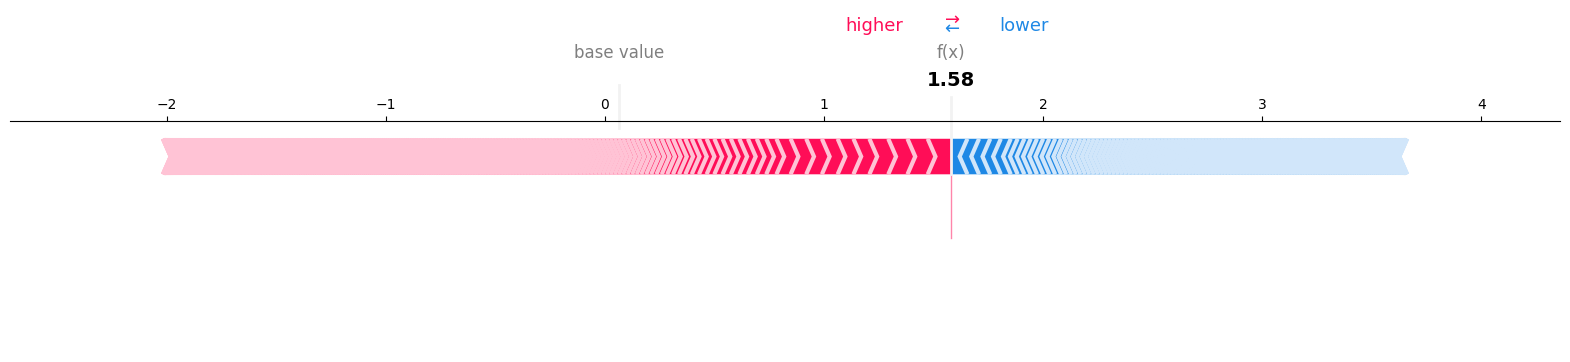

In [52]:
shap.force_plot(
    explainer.expected_value[1],
    test_shap_value[1],
    pd.DataFrame(X_new.toarray(), columns=pipe_bm[:-1].get_feature_names_out()).iloc[3,:],
    # feature_names = pipe_bm[:-1].get_feature_names_out(),
    # out_names = pipe_bm[:-1].get_feature_names_out(),
    matplotlib=True
)

In [54]:
shap.plots.force(explainer(sample_row2))

  0%|          | 0/1 [00:00<?, ?it/s]

TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[0]).

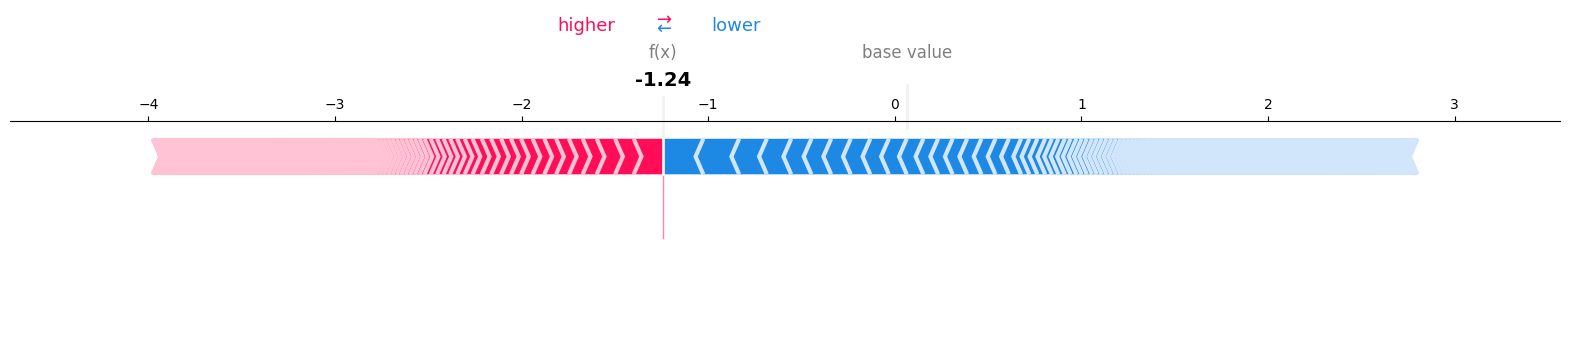

In [55]:
shap.force_plot(
    explainer.expected_value[1],
    test_shap_value2[1],
    matplotlib=True
)

In [59]:
pd.DataFrame(X_new.toarray(), columns=pipe_bm[:-1].get_feature_names_out()).iloc[3,:]

00                             0
000                            0
0000                           0
0001                           0
000a                           0
                              ..
中文                             0
另一方面                           0
联合国与区域及次区域组织在维持国际和平与安全方面的合作    0
联合国宪章                          0
集体安全条约组织                       0
Name: 3, Length: 105000, dtype: int64

In [60]:
from IPython.display import display

shap.force_plot(
    explainer.expected_value[1],
    test_shap_value2[1],
    pd.DataFrame(X_new.toarray(), columns=pipe_bm[:-1].get_feature_names_out()),
    # feature_names = pipe_bm[:-1].get_feature_names_out(),
    # out_names = pipe_bm[:-1].get_feature_names_out(),
    matplotlib=True
)

: 

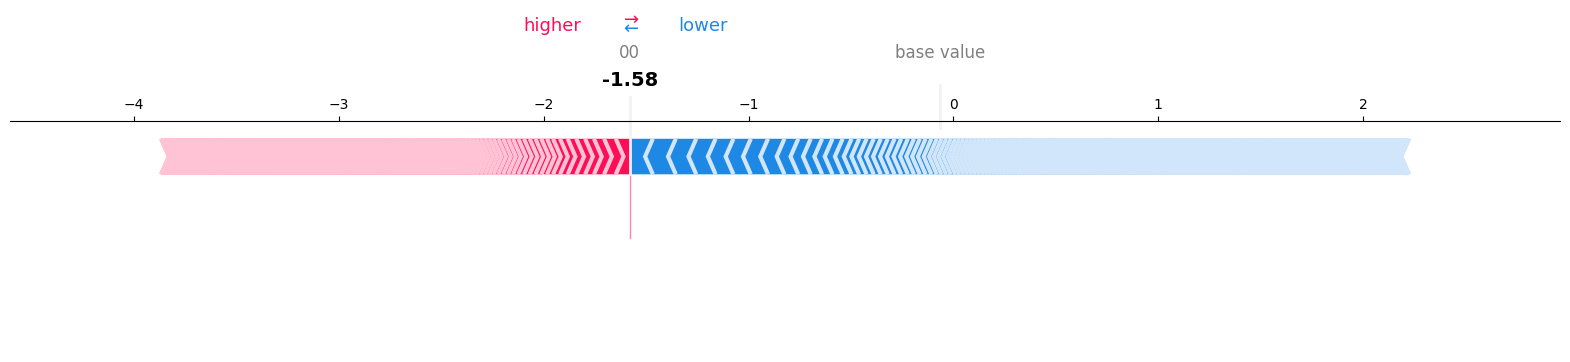

In [32]:
shap.force_plot(
    explainer.expected_value[0],
    test_shap_value[0],
    pd.DataFrame(X_new.toarray(), columns=pipe_bm[:-1].get_feature_names_out()).iloc[3,:],
    feature_names = pipe_bm[:-1].get_feature_names_out(),
    out_names = pipe_bm[:-1].get_feature_names_out(),
    matplotlib=True
)

In [54]:
cols = new_vec.get_feature_names_out()
X_train_num_df = pd.DataFrame(X_train_num, columns=cols)
X_train_num_df

,00,000,0000,000000031,00000017,000035,00004,000048,00006,000063,...,鉴于当代挑战和威胁的全球性质,集体安全条约组织,集体安全条约组织与联合国专门机构,集体安全条约组织是多层面结构,集体安全条约组织正在积极促进帮助阿富汗进行冲突后重建以及消除来自该国的毒品威胁的国际努力,集体安全条约组织秘书长博尔久扎,集体提出创新办法,非法贩运毒品以及确保国际信息安全,预防和解决冲突,ﬁnds
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
new_X = best_model.fit_transform(X_train)

AttributeError: This 'Pipeline' has no attribute 'fit_transform'

/Users/jennylee/misinformation-analysis


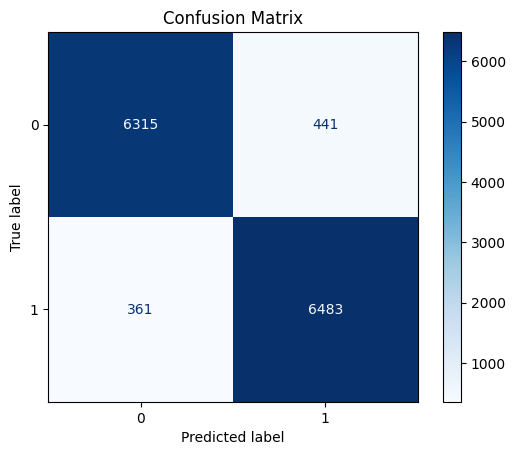

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os

print(os.getcwd())

predictions = best_model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
cm_fig = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
cm_fig.plot(cmap='Blues', values_format='d') 
plt.title('Confusion Matrix')
plt.savefig("images/confusion_matrix.png")

In [8]:
# cm_fig.savefig('projects/misinformation-analysis/figure/confusionmatrix.png', dpi=300)

In [11]:
best_model

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_features=105000, stop_words='english')),
                ('logisticregression', LogisticRegression(C=0.1))])

In [74]:
np.argmax(best_model.named_steps["logisticregression"].coef_)

31965

In [18]:
best_model.named_steps["countvectorizer"].get_feature_names_out()[31965]

'featured'

In [25]:
best_model.named_steps["logisticregression"].coef_.shape

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [112]:
coefs = np.sort(best_model.named_steps["logisticregression"].coef_.tolist()[0])[-10:].tolist()

In [95]:
top_indices = np.argsort(best_model.named_steps["logisticregression"].coef_.tolist()[0])[-10:]
print(top_indices.shape)
all_cols = best_model.named_steps["countvectorizer"].get_feature_names_out()
top_list = [all_cols[i] for i in top_indices]
np.set_printoptions(threshold=np.inf)
print(top_list)

(10,)
['posted', 'wfb', 'added', 'nbsp', 'images', 'getty', 'according', 'com', 'said', 'featured']


In [116]:
coef_comb = zip(top_list, coefs)
coef_df = pd.DataFrame(coef_comb, columns=["Feature", "Coef"]).sort_values(by="Coef", ascending=False)
coef_df.to_csv("data/processed/feature_importance.csv", index=False)

In [42]:
X_test.iloc[8]

'Nancy Pelosi lose ! press briefing Thursday , Pelosi criticize President Trump visit Saudi Arabia inaugural foreign trip . think unusual President United States Saudi Arabia . Saudi Arabia ! Pelosi . alphabetical . , Saudi Arabia . http : //www.youtube.com/watch ? v=_K8CJQq3YnQ friend neighbor decision-making process Saudi Arabia ? question . late odd thing Pelosi blurt press briefing . embarrass Democrats Civil society blah , blah , blah word salad Nancy Pelosi'

In [41]:
X_test_transformed = pipe_bm.predict(X_test.iloc[8])
X_test_transformed.shape

ValueError: Iterable over raw text documents expected, string object received.